In [50]:
import tensorflow as tf
from tensorflow.python.client import device_lib 
from tensorflow.python.client import device_lib

In [51]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [52]:
import IPython.display as display

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import pathlib
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation

np.set_printoptions(suppress=True)

In [53]:
# import the needed packages
import matplotlib.image as img
from tensorflow import keras
# shortcut to the ImageDataGenerator class
ImageDataGenerator = keras.preprocessing.image.ImageDataGenerator

In [54]:
path='./dataset'
data_dir=pathlib.Path(path)

In [55]:
tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)

True

In [56]:
path="D:\CODE\CNN\\final_project\\finalCNN\dataset"
data_dir=pathlib.Path(path)
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

47127

In [57]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*')])
CLASS_NAMES

array(['cars', 'cats', 'dogs', 'flowers', 'human', 'motobikes'],
      dtype='<U9')

In [58]:
image_generator=ImageDataGenerator(rescale=1./255)

In [59]:
BATCH_SIZE = 30
IMG_HEIGHT = 256
IMG_WIDTH = 256
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

In [60]:
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

Found 47127 images belonging to 6 classes.


In [61]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

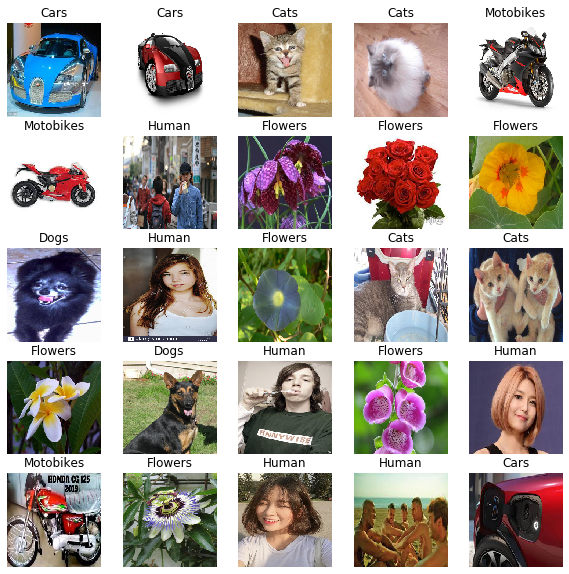

In [62]:
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

In [63]:
imgDataGen=ImageDataGenerator(
    validation_split=0.2,
    rescale=1./255,
    horizontal_flip=True,
    zoom_range=0.3,
    rotation_range=15.,
    width_shift_range=0.1,
    height_shift_range=0.1,
)

In [64]:
train_dataset = imgDataGen.flow_from_directory(
    directory=str(data_dir),
    target_size = (IMG_HEIGHT, IMG_WIDTH), 
    classes = list(CLASS_NAMES),
    batch_size = BATCH_SIZE,
    subset = 'training'
)

val_dataset = imgDataGen.flow_from_directory(
    directory=str(data_dir),
    target_size = (IMG_HEIGHT, IMG_WIDTH), 
    classes = list(CLASS_NAMES),
    batch_size =BATCH_SIZE,
    subset = 'validation'
)

Found 37703 images belonging to 6 classes.
Found 9424 images belonging to 6 classes.


In [65]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(ROWS, COLS, CHANNELS), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, (1,1), activation='relu'))
#model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dropout(0.4))

model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=6, activation='sigmoid'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 32, 32, 128)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 131072)           

In [66]:
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.SGD(learning_rate=0.001,momentum=0.9),
              metrics=['acc'])

In [67]:
history = model.fit_generator(
    train_dataset, 
    steps_per_epoch=STEPS_PER_EPOCH
    validation_data = val_dataset,
    workers=10,
    epochs=20,
)

Epoch 1/20
1257/1257 [==============================] - 388s 309ms/step - loss: 0.3195 - acc: 0.8606 - val_loss: 0.1616 - val_acc: 0.8596
Epoch 2/20
1257/1257 [==============================] - 415s 330ms/step - loss: 0.2544 - acc: 0.8902 - val_loss: 0.3068 - val_acc: 0.8808
Epoch 3/20
1257/1257 [==============================] - 403s 321ms/step - loss: 0.2301 - acc: 0.9026 - val_loss: 0.2900 - val_acc: 0.8919
Epoch 4/20
1257/1257 [==============================] - 382s 304ms/step - loss: 0.2152 - acc: 0.9089 - val_loss: 0.2416 - val_acc: 0.8906
Epoch 5/20
1257/1257 [==============================] - 369s 293ms/step - loss: 0.2025 - acc: 0.9156 - val_loss: 0.0468 - val_acc: 0.9008
Epoch 6/20
1257/1257 [==============================] - 369s 293ms/step - loss: 0.1938 - acc: 0.9189 - val_loss: 0.1328 - val_acc: 0.9047
Epoch 7/20
1257/1257 [==============================] - 371s 295ms/step - loss: 0.1874 - acc: 0.9222 - val_loss: 0.2699 - val_acc: 0.9076
Epoch 8/20
1257/1257 [============

In [68]:
import h5py
from keras.models import load_model
model.save('trained-model.h5')

In [69]:
def plot_history(history, yrange):
    '''Plot loss and accuracy as a function of the epoch,
    for the training and validation datasets.
    '''
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get number of epochs
    epochs = range(len(acc))

    # Plot training and validation accuracy per epoch
    plt.plot(epochs, acc)
    plt.plot(epochs, val_acc)
    plt.title('Training and validation accuracy')
    plt.ylim(yrange)
    
    # Plot training and validation loss per epoch
    plt.figure()

    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.title('Training and validation loss')
    
    plt.show()

In [70]:
model_new=tf.keras.models.load_model('trained-model.h5')
model_new.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 32, 32, 128)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 131072)           